<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Lec_4/Data_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# %load https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/pre.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_validate

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve, validation_curve

PCA
====
General idea is that we make new features from the original ones such that they sort of carry more information about the data compared to the original features.

In [0]:
def sample_data_2d(n_points):
  x_list = np.arange(0,1,1/n_points)
  return np.array([x_list, [x+np.random.normal(0, .2*(1-2*np.abs(x-.5)) )  for x in x_list ] ])

(1, 100)


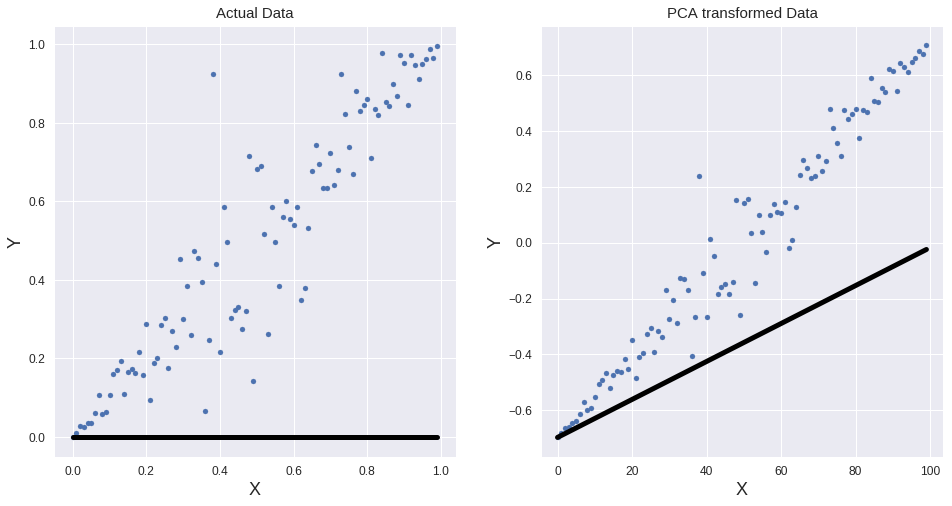

In [111]:
data_2d = sample_data_2d(100)
pca_2d = PCA(n_components=1)

pca_data_2d = pca_2d.fit_transform(data_2d.T).T

print(pca_data_2d.shape)
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,2,1,xlabel='X', ylabel='Y', title = 'Actual Data')
ax2 = fig.add_subplot(1,2,2,xlabel='X', ylabel='Y', title = 'PCA transformed Data')
ax1.scatter(data_2d[0], data_2d[1])
ax1.plot(x_axis[:,0],x_axis[:,1] , color='black')
ax2.scatter(range(100), pca_data_2d)
ax2.plot(pca_2d.transform(x_axis[:,:2]) , color='black')
plt.show()

How does PCA affect the data?
====
Here we use a visual example to see how PCA changes the data and what it keeps. 

In [0]:
from keras.datasets import fashion_mnist
((X_train, Y_train), (X_test, Y_test)) = fashion_mnist.load_data()

(28, 28)


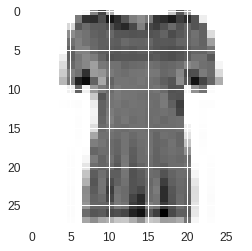

In [0]:
print(X_train[10].shape)
plt.imshow(X_train[10])

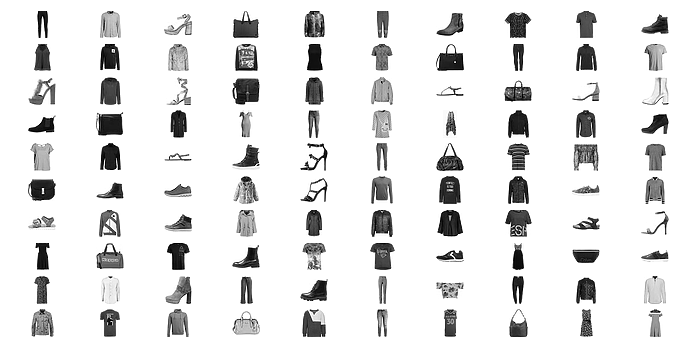

In [0]:
n_matrix = 10
n_samples = len(Y_train) #+ len(Y_test)
rand_ind_list = np.random.randint( n_samples , size=n_matrix**2)
fig = plt.figure(figsize=(12,6))
for index in range(n_matrix**2):
  im_ind = rand_ind_list[index]
  plt.subplot(n_matrix, n_matrix, index + 1)
  plt.axis('off')
  plt.imshow( X_train[ im_ind ]  , cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()

In [0]:
## Let's see wht pca does!
n_c = 49  ## # components we want to keep. 
pca = PCA(n_components=n_c)
X_train = X_train.reshape(n_samples,-1)
pca.fit(X_train)

reduced_X_train = pca.transform(X_train)
print('The shape of the new data is: {}'.format(reduced_X_train.shape))

The shape of the new data is: (60000, 49)


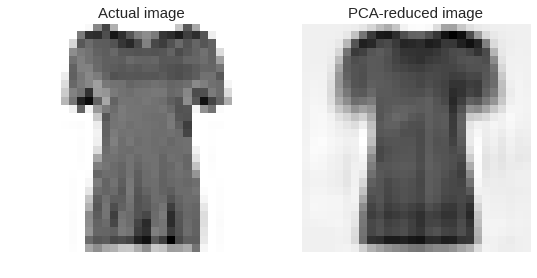

In [0]:

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1,2,1, title = 'Actual image')
ax2 = fig.add_subplot(1,2,2, title = 'PCA-reduced image')
ax1.imshow(X_train[10].reshape(28,28))
ax2.imshow(pca.inverse_transform(reduced_X_train[10]).reshape(28,28))
ax1.axis('off')
ax2.axis('off')
plt.show()


How does PCA work?
====
It uses Schmidt Decomposition to diagonalize the X matrix. Note that this is not a normal matrix (n_samples >n_features) and as such, eigenvalue decomposition would not work here. 

The Schmidt decomposition gives the basis change and also the Schmidt numbers. The algorithm, picks the largetst n_component and truncates the rest. 

In sklearn implementation of PCA, components_ gives the vectors of principals (their weights in terms of the original features). More specifically, it transforms the data according to:

(784,)
(49, 784)


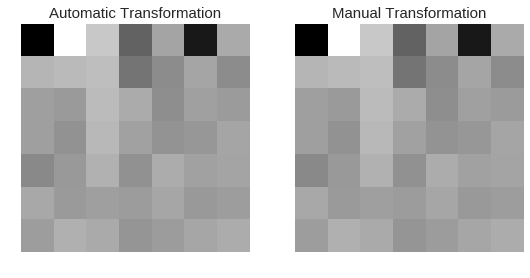

In [0]:
m_reduced_X_train = np.dot(X_train - pca.mean_, pca.components_.T)
print(pca.mean_.shape)
print(pca.components_.shape)

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(1,2,1, title = 'Automatic Transformation')
ax2 = fig.add_subplot(1,2,2, title = 'Manual Transformation')
ax1.imshow(reduced_X_train[10].reshape(7,7))
ax2.imshow(m_reduced_X_train[10].reshape(7,7))
ax1.axis('off')
ax2.axis('off')
plt.show()

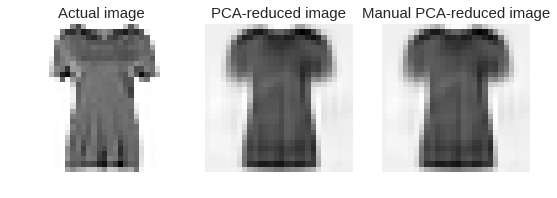

In [0]:
'''
And for the inverse transformation, we get:
'''
inv_transformed_X_train = np.dot(m_reduced_X_train, pca.components_) + pca.mean_


fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(1,3,1, title = 'Actual image')
ax2 = fig.add_subplot(1,3,2, title = 'PCA-reduced image')
ax3 = fig.add_subplot(1,3,3, title = 'Manual PCA-reduced image')
ax1.imshow(X_train[10].reshape(28,28))
ax2.imshow(pca.inverse_transform(reduced_X_train[10]).reshape(28,28))
ax3.imshow(inv_transformed_X_train[10].reshape(28,28))

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
plt.show()


What are the components?
Each principal is in fact a linear superposition of different features. The component_ returns these weights. This also tells you how different feature contribute to the principals of the pca.

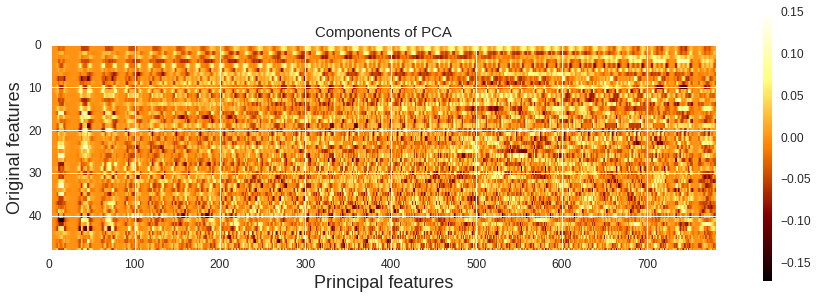

In [0]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,1,1, xlabel = 'Principal features', ylabel = 'Original features' ,title = 'Components of PCA')
pca_com = ax1.imshow(pca.components_, cmap=plt.cm.afmhot, aspect = 5)
plt.colorbar(pca_com, ax=ax1)
plt.show()

When to stop? How many features do we need?
====
One approach is to test for different n_components and find the optimal value that gives a high score/low loss and is small enough. 
There is an alternative which does not require any training and that's to use the schmidt coefficients or similar measures for keeping the components. Specifically, we can plot the weight/schmidt values and put a cut-off based on that.  
In sklearn PCA, there is an attribute calledn''explained_variance_ratio_`` which we use for this.

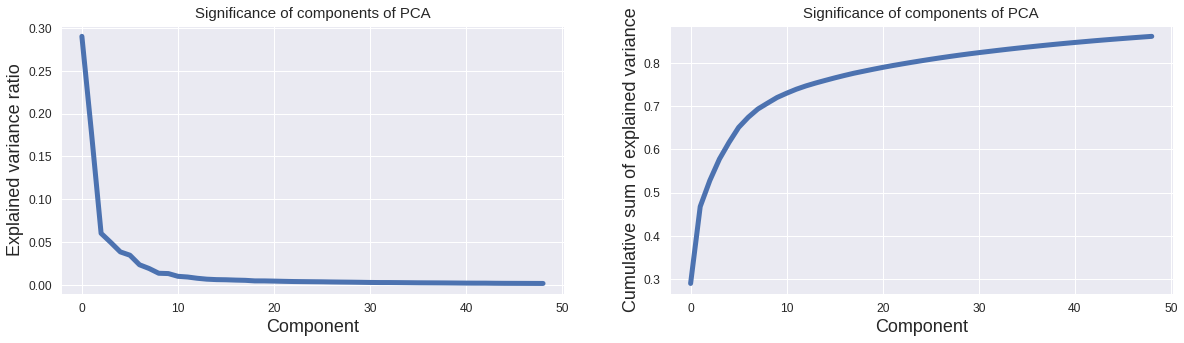

In [0]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1,2,1, title = 'Significance of components of PCA', xlabel='Component', ylabel='Explained variance ratio')
ax1.plot(pca.explained_variance_ratio_)
ax1 = fig.add_subplot(1,2,2, title = 'Significance of components of PCA', xlabel='Component', ylabel='Cumulative sum of explained variance')
ax1.plot(np.cumsum(pca.explained_variance_ratio_))

plt.show()


PCA for Visualization
===


In [0]:
((X_train, Y_train), (X_test, Y_test)) = fashion_mnist.load_data()

X_train = X_train.reshape(n_samples,-1)

## It is important to always scale the data for PCA, why do you think that is?
scaler = StandardScaler()
s_X_train = scaler.fit_transform(X_train)

pca = PCA(n_components=3)

pca.fit(s_X_train)
reduced_s_X_train = pca.transform(s_X_train).T
print('The shape of our reduced data is: {}'.format(reduced_s_X_train.shape))

The shape of our reduced data is: (3, 60000)


In [0]:
from mpl_toolkits import mplot3d

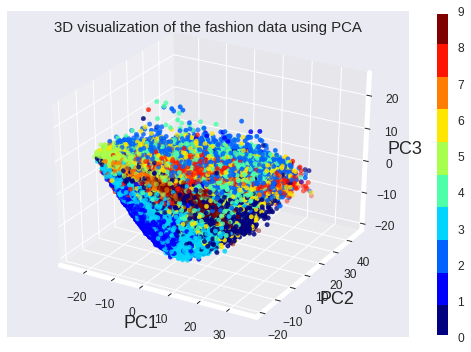

In [0]:
# %matplotlib notebook
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection='3d', xlabel='PC1', ylabel='PC2', zlabel='PC3', title = '3D visualization of the fashion data using PCA')
plot = ax.scatter3D(reduced_s_X_train[0], reduced_s_X_train[1], reduced_s_X_train[2], c=Y_train, cmap = plt.cm.get_cmap('jet', 10) )
plt.colorbar(plot, ticks=range(10))
plt.show()


The shape of our reduced data is: (2, 60000)


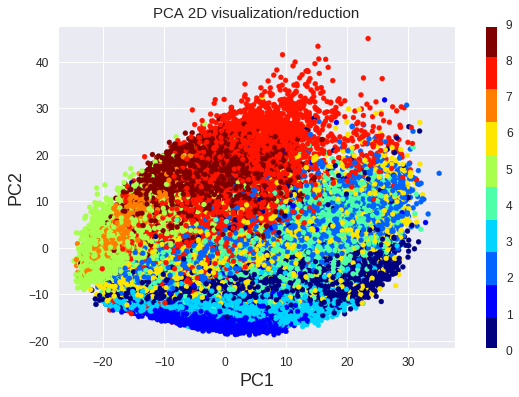

In [0]:
X_train = X_train.reshape(n_samples,-1)

scaler = StandardScaler()
s_X_train = scaler.fit_transform(X_train)

pca = PCA(n_components=2)

pca.fit(s_X_train)
reduced_s_X_train = pca.transform(s_X_train).T
print('The shape of our reduced data is: {}'.format(reduced_s_X_train.shape))

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, xlabel='PC1', ylabel='PC2', title='PCA 2D visualization/reduction')
plt.scatter(reduced_s_X_train[0], reduced_s_X_train[1],  c=Y_train, cmap = plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.show()


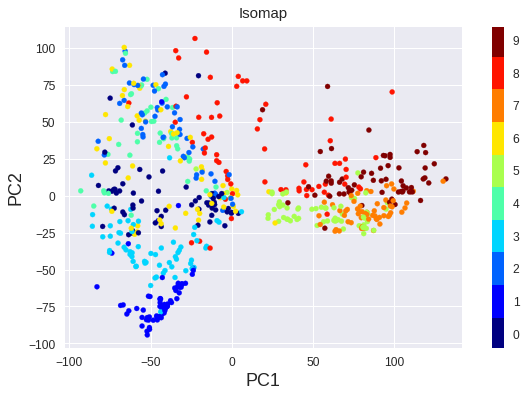

In [0]:
##Other techniques, we start we isomap
from sklearn.manifold import Isomap
np_rate = 100  ## We keep only 1% of the data, for the sake of time

## It woeks just like PCA or scalers. 
model = Isomap(n_components=2)
proj = model.fit_transform(s_X_train[::np_rate])  


fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, xlabel='PC1', ylabel='PC2', title='Isomap')
plt.scatter(proj[:, 0], proj[:, 1], c=Y_train[::np_rate], cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

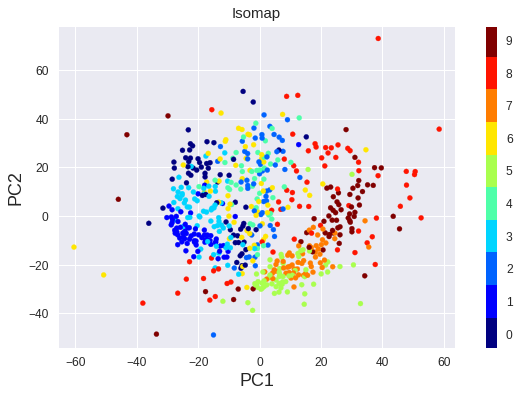

In [108]:
##Other techniques: Multi-dimensional scaling
from sklearn.manifold import MDS

np_rate = 100  ## We keep only 1% of the data
model = MDS(n_components=2)
proj = model.fit_transform(s_X_train[::np_rate])  

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, xlabel='PC1', ylabel='PC2', title='Isomap')
plt.scatter(proj[:, 0], proj[:, 1], c=Y_train[::np_rate], cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

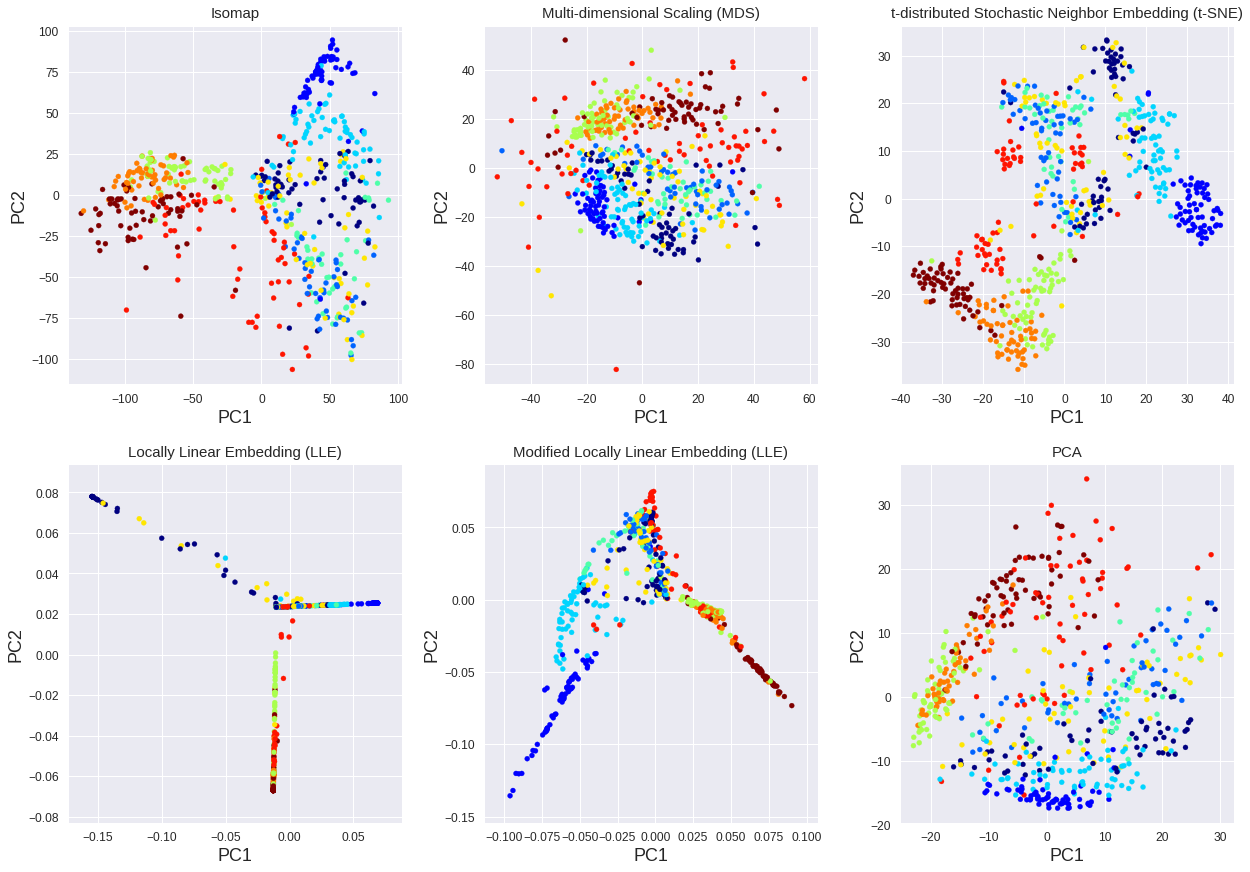

In [112]:
##Let's now compare these different techniques. 

n_samples = len(Y_train) 
X_train = X_train.reshape(n_samples,-1)

scaler = StandardScaler()
s_X_train = scaler.fit_transform(X_train)


from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, SpectralEmbedding, TSNE

models = {'Isomap':Isomap(n_components=2).fit_transform(s_X_train[::np_rate]) , 
          'Multi-dimensional Scaling (MDS)':MDS(n_components=2).fit_transform(s_X_train[::np_rate]) ,
          "t-distributed Stochastic Neighbor Embedding (t-SNE)": TSNE(n_components=2).fit_transform(s_X_train[::np_rate]) , 
          'Locally Linear Embedding (LLE)':LocallyLinearEmbedding(n_components=2).fit_transform(s_X_train[::np_rate]) ,
          'Modified Locally Linear Embedding (LLE)':LocallyLinearEmbedding(n_components=2, method = 'modified').fit_transform(s_X_train[::np_rate]) ,
#           'Local Tangent Space Alignment':LocallyLinearEmbedding(n_components=2, method = 'ltsa').fit_transform(s_X_train[::np_rate]) ,
          'PCA': PCA(n_components=2).fit_transform(s_X_train[::np_rate]) }



np_rate = 100  ## We keep only 1% of the data
ind=1
fig = plt.figure(figsize=(18,18))
for model in models.keys():
  proj = models[model]   #.transform(s_X_train[::np_rate])  ##I pushed it all to the dictionary.
  
  ax = fig.add_subplot( 3 , 3 ,ind, xlabel='PC1', ylabel='PC2', title=model)
  ax.scatter(proj[:, 0], proj[:, 1], c=Y_train[::np_rate], cmap=plt.cm.get_cmap('jet', 10))
#   plt.colorbar(plot , ticks=range(10))
#   ax.set_clim(-0.5, 9.5)
  ind += 1
  
plt.tight_layout()  
plt.show()

In [0]:
url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' )
n_s = 1000
data = shuffle(data).sample(n_s)
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    

# data = pd.read_csv('particle-identification-from-detector-responses.zip', compression='zip')
data.head()

,id,p,theta,beta,nphe,ein,eout
1377107,321,1.037920,0.192148,0.901549,0,0.036301,0.059281
2845159,211,0.333410,0.857104,0.911739,0,0.000000,0.000000
4359640,2212,1.232470,0.593416,0.795555,0,0.184894,0.220966
3919070,211,1.305260,0.223660,0.994084,47,0.026368,0.073152
1532100,2212,0.848402,0.433237,0.663110,0,0.000000,0.000000


In [0]:
n_s = 1000
data = shuffle(data).sample(n_s)
Y = data['id']
data = data.drop('id', axis=1)

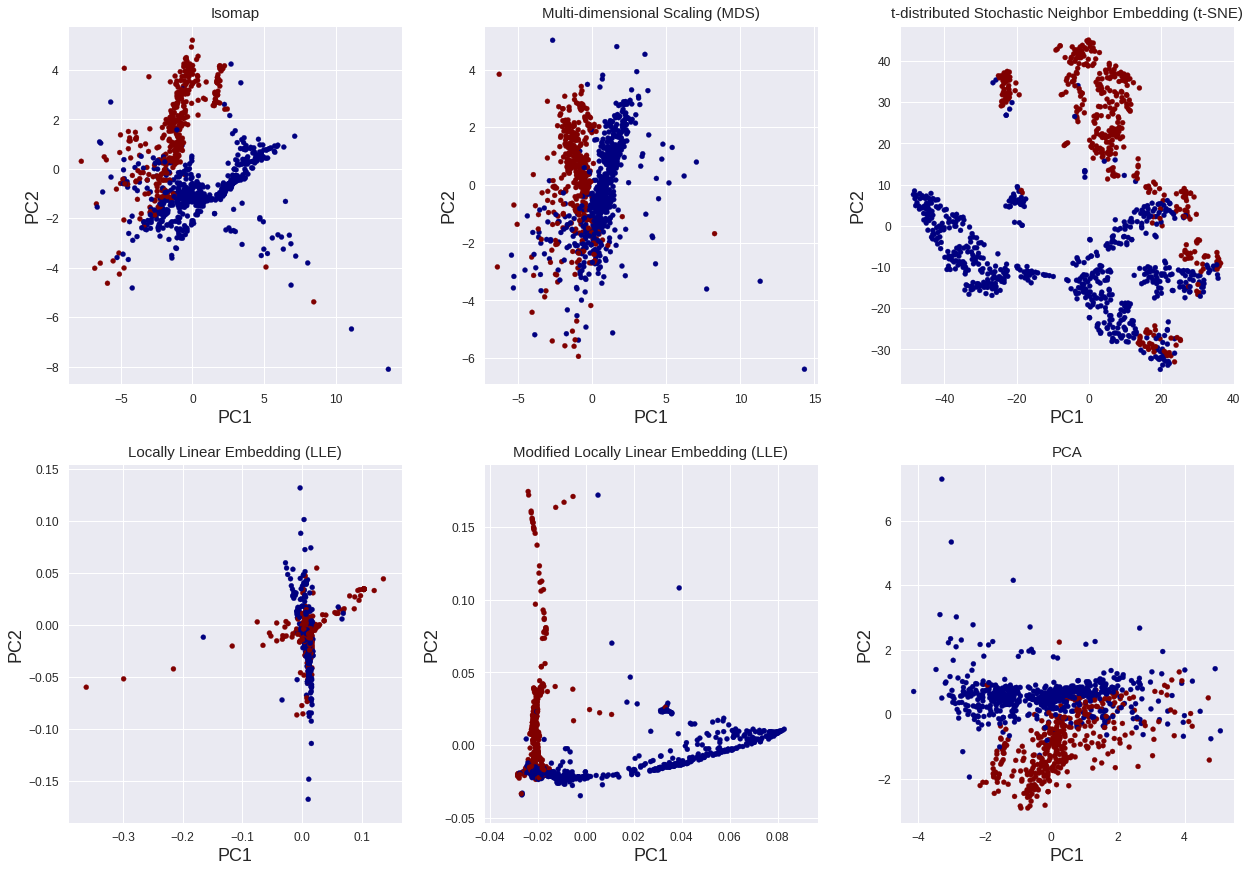

In [0]:
### Do this for the particle identification data and see how it would look like a 2D plot.

n_samples = n_s

Y = list(set( data['id'] ))
data = data.drop('id', axis=1)

scaler = StandardScaler()
s_data = scaler.fit_transform(data)


from sklearn.manifold import MDS, LocallyLinearEmbedding, Isomap, SpectralEmbedding, TSNE

models = {'Isomap':Isomap(n_components=2).fit_transform(s_data) , 
          'Multi-dimensional Scaling (MDS)':MDS(n_components=2).fit_transform(s_data) ,
          "t-distributed Stochastic Neighbor Embedding (t-SNE)": TSNE(n_components=2).fit_transform(s_data) , 
          'Locally Linear Embedding (LLE)':LocallyLinearEmbedding(n_components=2).fit_transform(s_data) ,
          'Modified Locally Linear Embedding (LLE)':LocallyLinearEmbedding(n_components=2, method = 'modified').fit_transform(s_data) ,
          'PCA': PCA(n_components=2).fit_transform(s_data) }



np_rate = 100  ## We keep only 1% of the data
ind=1
fig = plt.figure(figsize=(18,18))
for model in models.keys():
  
  proj = models[model]#.transform(s_X_train[::np_rate])  

  ax = fig.add_subplot( 3 , 3 ,ind, xlabel='PC1', ylabel='PC2', title=model)
  ax.scatter(proj[:, 0], proj[:, 1], c=Y, cmap=plt.cm.get_cmap('jet', 5))
#   plt.colorbar(plot , ticks=range(10))
#   ax.set_clim(-0.5, 9.5)
  ind += 1
  
plt.tight_layout()  
plt.show()

Also check out the following functions:
- TruncatedSVD
- RandomizedPCA